In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets.emnist_dataset import EmnistDataset

In [2]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [4]:
dataset = EmnistDataset(subsample_fraction=0.25)
dataset.load_or_generate_data()
print(dataset)
print(dataset.x_train.shape, dataset.y_train.shape)
print(dataset.x_test.shape, dataset.y_test.shape)

EMNIST Dataset
Num classes: 62
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}
Input shape: [28, 28]

(84074, 28, 28) (84074, 62)
(13947, 28, 28) (13947, 62)


In [5]:
from text_recognizer.networks.lenet import lenet

network = lenet(dataset.input_shape, output_shape=(dataset.num_classes, 1))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
expand_dims (Lambda)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [6]:
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
network.fit(
    x=dataset.x_train,
    y=dataset.y_train,
    batch_size=64,
    epochs=5,
    validation_data=(dataset.x_test, dataset.y_test)
)

Epoch 1/5
1314/1314 [==============================] - 5s 4ms/step - loss: 0.3654 - accuracy: 0.9167 - val_loss: 0.0732 - val_accuracy: 0.9788
Epoch 2/5
1314/1314 [==============================] - 5s 3ms/step - loss: 0.0830 - accuracy: 0.9762 - val_loss: 0.0591 - val_accuracy: 0.9822
Epoch 3/5
1314/1314 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9824 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 4/5
1314/1314 [==============================] - 5s 4ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0327 - val_accuracy: 0.9900
Epoch 5/5
1314/1314 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0327 - val_accuracy: 0.9900


(1, 28, 28, 1)
[[9.99999523e-01 5.00053732e-09 5.34690173e-07 4.33240915e-10
  5.36466072e-09 8.73429662e-10 4.37479564e-08 1.23378130e-09
  1.10728049e-08 1.77422692e-13 1.73106366e-15 8.80899357e-15
  5.05052684e-12 1.29500242e-14 2.76758027e-13 2.74695834e-14
  5.34096638e-12 6.90764051e-15 1.55612294e-11 1.65399760e-17
  3.71540441e-16 5.13859585e-14 1.06197577e-14 2.66463284e-14
  6.26649137e-14 1.23309430e-13 8.11075653e-14 1.42759797e-14
  2.74568562e-10 1.85377172e-13 3.64802225e-15 9.96187707e-17
  1.38986606e-16 8.89908239e-20 2.36341335e-15 1.02858604e-10
  6.93700460e-15 1.68719119e-11 7.71908470e-17 2.75828180e-11
  7.63461085e-14 1.65765825e-13 5.41621801e-14 4.84974994e-12
  2.44462055e-11 1.98915182e-17 1.26791210e-14 8.94500606e-14
  3.69860705e-11 9.72429399e-15 1.96485470e-15 8.70255951e-12
  4.73197106e-11 4.89993289e-11 2.13393114e-20 2.93501522e-16
  1.69292835e-12 9.59823401e-11 1.40715699e-15 2.92891427e-12
  1.44630893e-14 2.16170520e-13]]
0
0


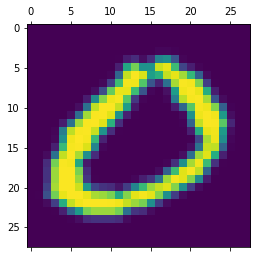

In [7]:
x_example = dataset.x_test[0:1]
plt.matshow(x_example[0])

x_example = np.expand_dims(x_example, -1)
print(x_example.shape)
preds = network.predict(x_example)
print(preds)

ind = np.argmax(preds)
print(ind)

print(dataset.mapping[ind])